# Adult Census Income EDA and Prediction

In this kernel I work with the UCI Adult Census Income dataset. The prediction task is to determine whether a person makes over $50K a year. I start with an exhaustive EDA, and I then train various models to solve the prediction task.

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline


import os
#print(os.listdir("../input"))

data = pd.read_csv("../../Data/adult.csv")


In [2]:
from aif360.datasets import StandardDataset
from aif360.metrics import BinaryLabelDatasetMetric, ClassificationMetric
import matplotlib.patches as patches
from aif360.algorithms.preprocessing import Reweighing
#from packages import *
#from ml_fairness import *
import matplotlib.pyplot as plt
import seaborn as sns



from IPython.display import Markdown, display

## Exploratory Data Analysis

In [3]:
print(len(data))
data.head(10)

32561


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,>50K


In [4]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

Good.

In [5]:
data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


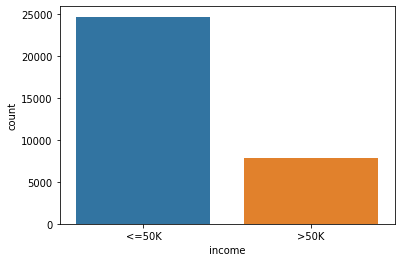

In [6]:
sns.countplot(data['income'])
plt.show()

### Distribution of features

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


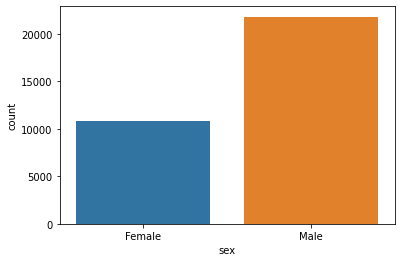

In [7]:
# Sex distribution
sns.countplot(data['sex'])
plt.show()

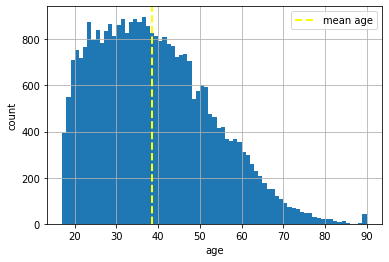

In [8]:
# Age distribution
ages = data['age'].hist(bins=max(data['age'])-min(data['age']))
mean_val = np.mean(data['age'])
plt.axvline(mean_val, linestyle='dashed', linewidth=2, color='yellow', label='mean age')
plt.xlabel('age')
plt.ylabel('count')
plt.legend()
plt.show()

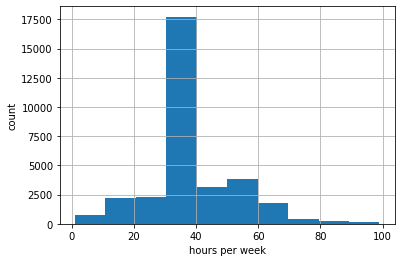

In [9]:
data['hours.per.week'].hist()
plt.xlabel('hours per week')
plt.ylabel('count')
plt.show()

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data

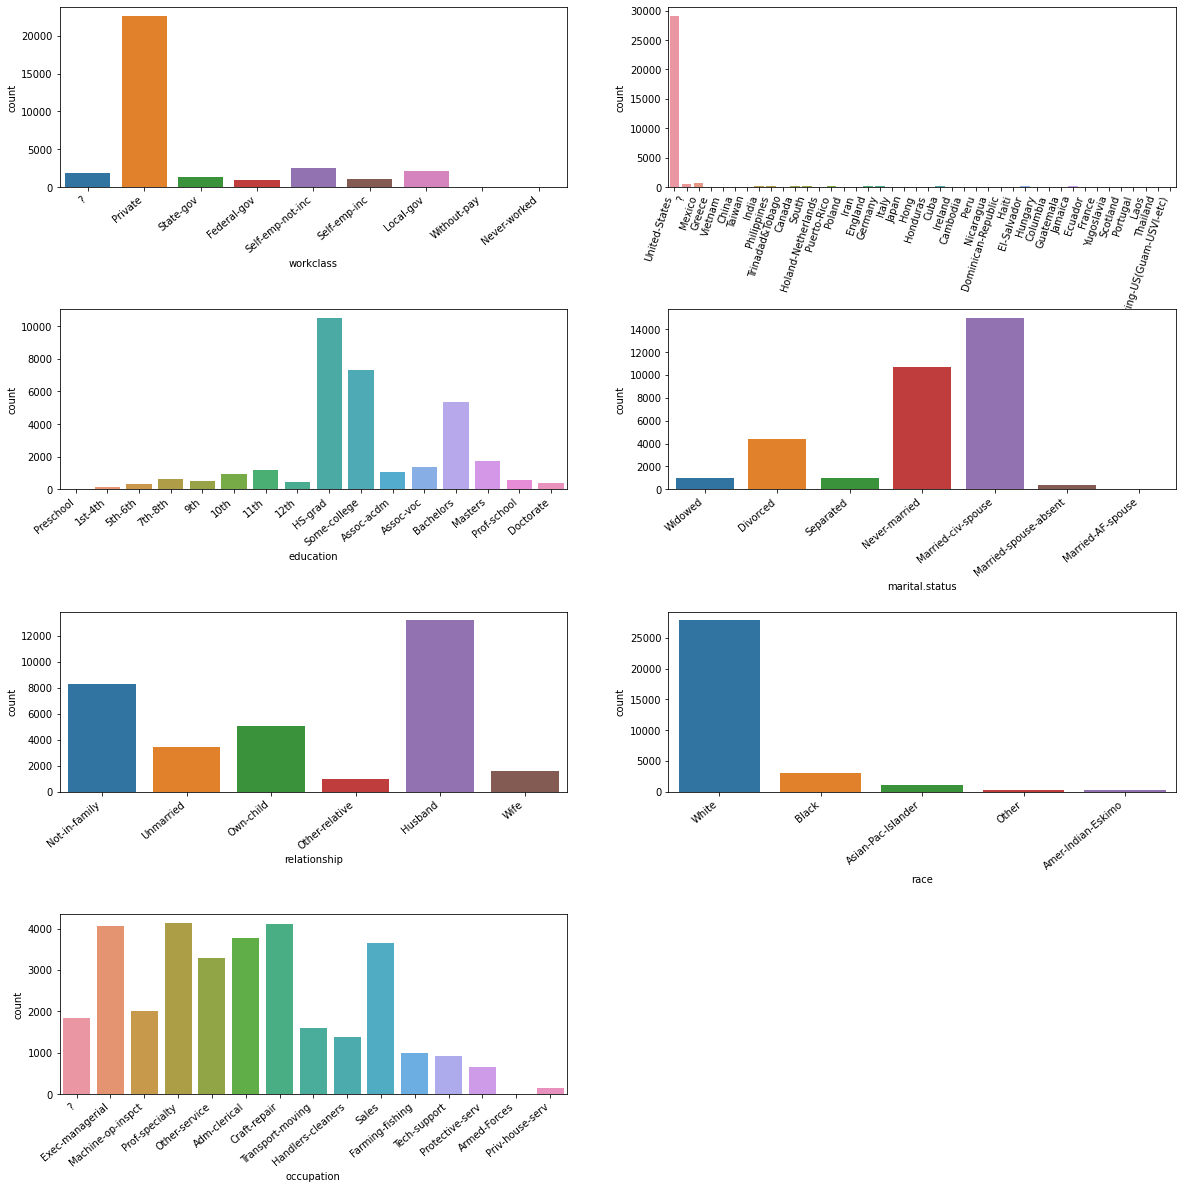

In [10]:
fig, axs = plt.subplots(ncols=2, nrows=4, figsize=(20, 20))
plt.subplots_adjust(hspace=0.68)
fig.delaxes(axs[3][1])


# Workclass
wc_plot = sns.countplot(data['workclass'], ax=axs[0][0])
wc_plot.set_xticklabels(wc_plot.get_xticklabels(), rotation=40, ha="right")

# Native country
nc_plot = sns.countplot(data['native.country'], ax=axs[0][1])
nc_plot.set_xticklabels(nc_plot.get_xticklabels(), rotation=72, ha="right")

# Education
order=['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 'HS-grad',
       'Some-college', 'Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Masters', 'Prof-school', 'Doctorate']
ed_plot = sns.countplot(data['education'], order=order, ax=axs[1][0])
ed_plot.set_xticklabels(ed_plot.get_xticklabels(), rotation=40, ha="right")

# Marital status
ms_plot = sns.countplot(data['marital.status'], ax=axs[1][1])
ms_plot.set_xticklabels(ms_plot.get_xticklabels(), rotation=40, ha="right")

# Relationship
rel_plot = sns.countplot(data['relationship'], ax=axs[2][0])
rel_plot.set_xticklabels(rel_plot.get_xticklabels(), rotation=40, ha="right")

# Race
race_plot = sns.countplot(data['race'], ax=axs[2][1])
race_plot.set_xticklabels(race_plot.get_xticklabels(), rotation=40, ha="right")

# Occupation
occ_plot = sns.countplot(data['occupation'], ax=axs[3][0])
occ_plot.set_xticklabels(occ_plot.get_xticklabels(), rotation=40, ha="right")

plt.show()


### How do features relate to one another?

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


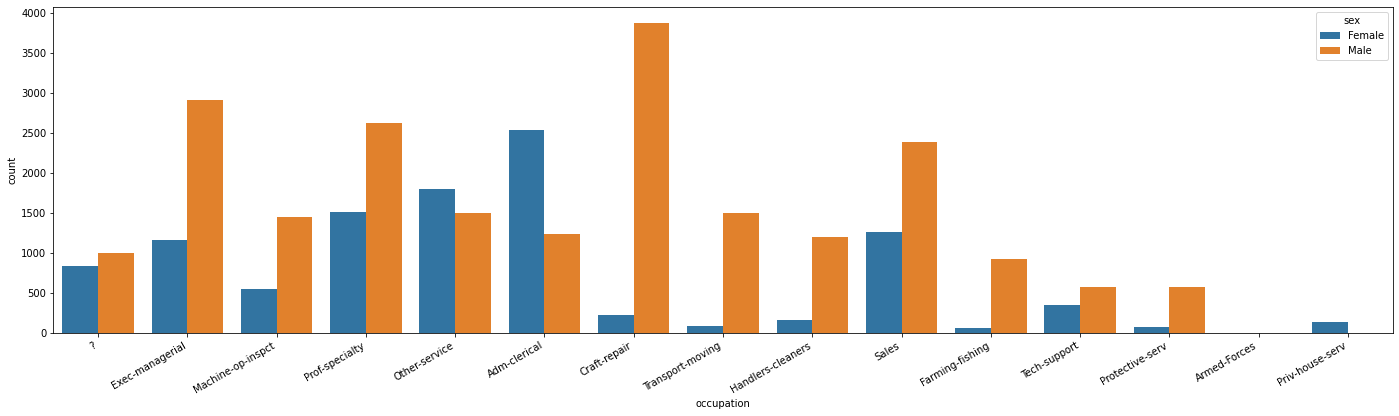

In [11]:
plt.figure(figsize=(24, 6))
ro = sns.countplot(data['occupation'], hue=data['sex'])
ro.set_xticklabels(ro.get_xticklabels(), rotation=30, ha="right")
plt.show()


Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


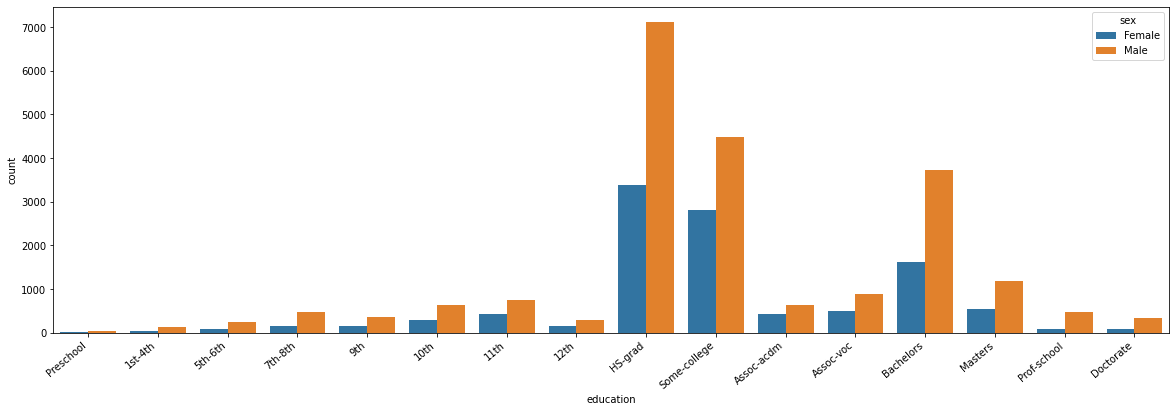

In [12]:
plt.figure(figsize=(20, 6))
ro = sns.countplot(data['education'], hue=data['sex'], order=order)
ro.set_xticklabels(ro.get_xticklabels(), rotation=40, ha="right")
#ro.set_yscale('log')
plt.show()

In [13]:
data['income'] = data['income'].map({'<=50K': 0, '>50K': 1}) 

### How do features relate to income?

catplot is a figure-level function and does not accept target axes. You may wish to try barplot
FixedFormatter should only be used together with FixedLocator
catplot is a figure-level function and does not accept target axes. You may wish to try barplot
FixedFormatter should only be used together with FixedLocator
catplot is a figure-level function and does not accept target axes. You may wish to try barplot
FixedFormatter should only be used together with FixedLocator
catplot is a figure-level function and does not accept target axes. You may wish to try barplot
FixedFormatter should only be used together with FixedLocator
catplot is a figure-level function and does not accept target axes. You may wish to try barplot
FixedFormatter should only be used together with FixedLocator
catplot is a figure-level function and does not accept target axes. You may wish to try barplot
FixedFormatter should only be used together with FixedLocator
catplot is a figure-level function and does not acce

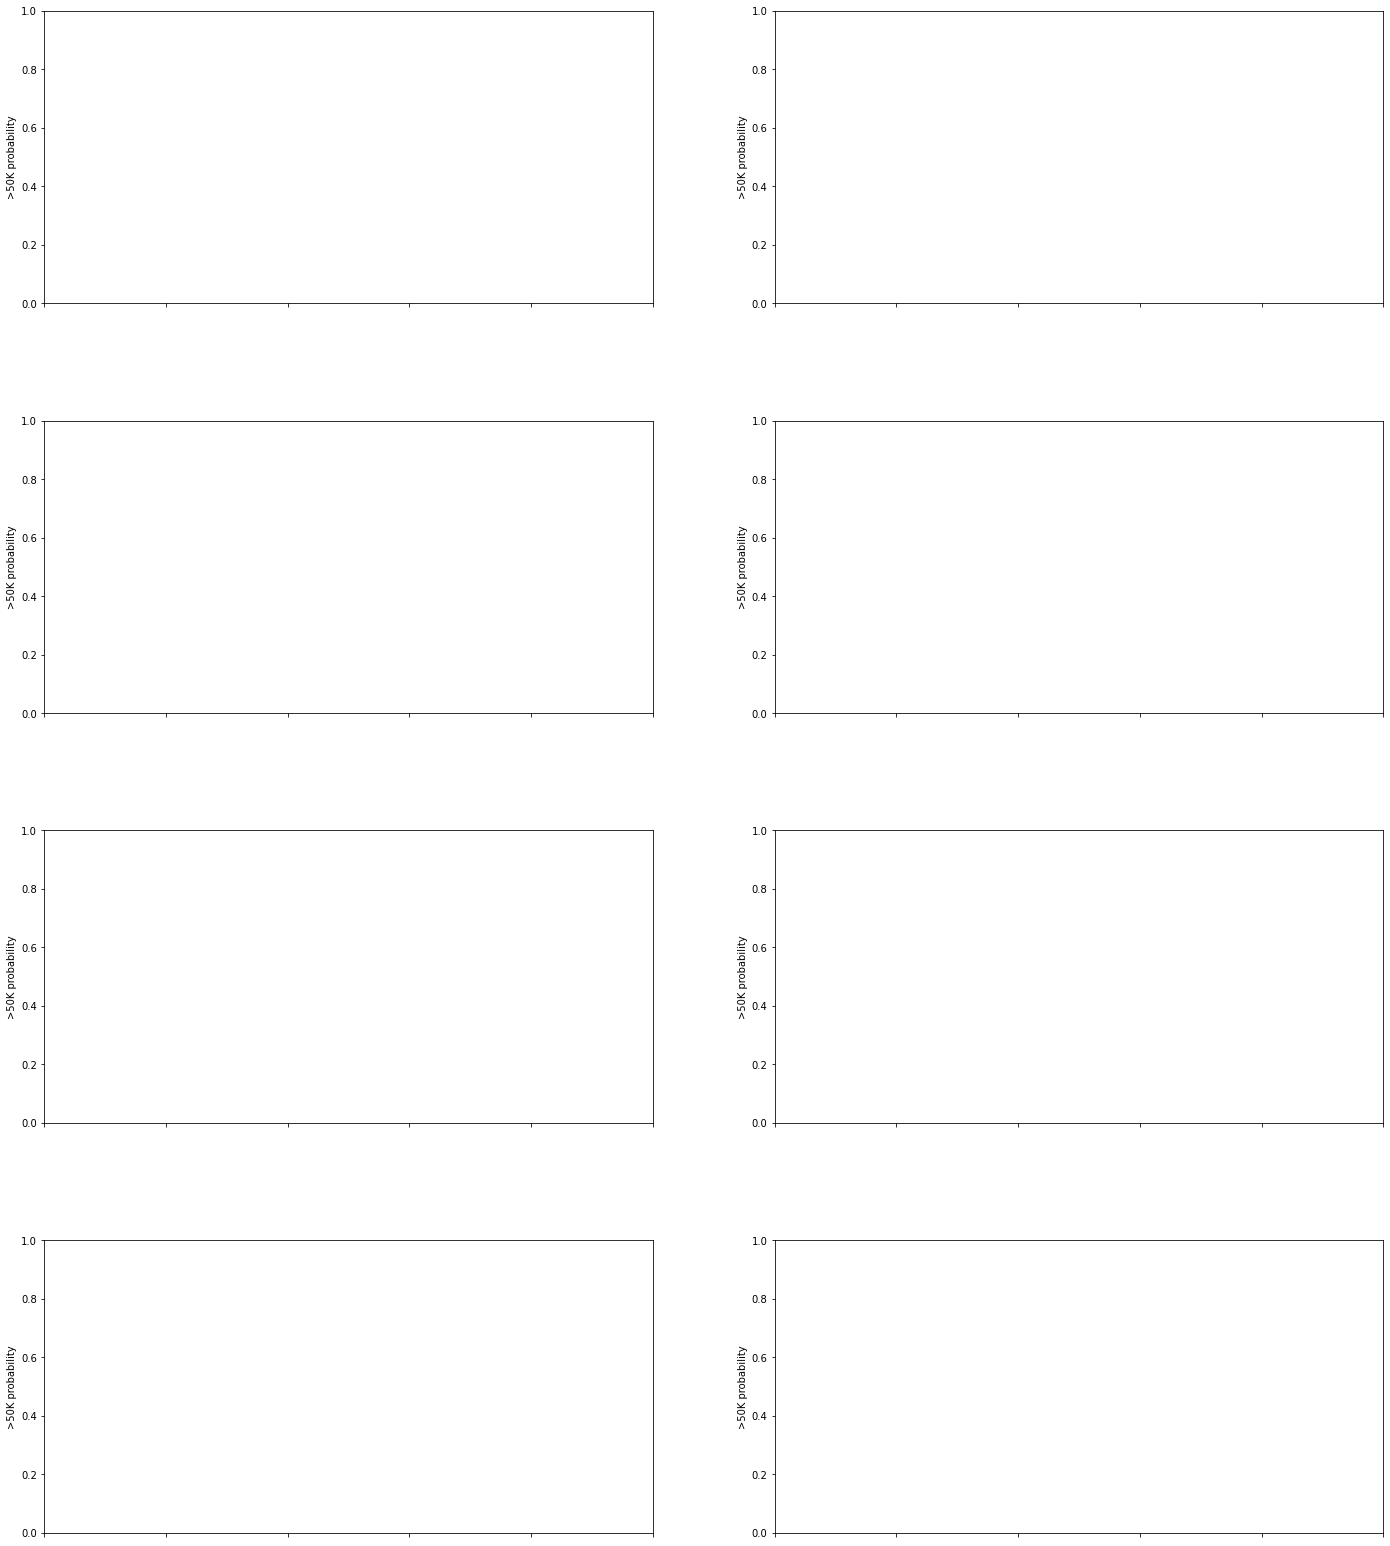

In [14]:
fig, axs = plt.subplots(ncols=2, nrows=4, figsize=(24, 28))
#fig.delaxes(axs[3][1])
plt.subplots_adjust(hspace=0.4)

# education and income
sns.catplot(x="education", y="income", data=data, kind="bar", height = 6, palette = "muted", order=order, ax=axs[0][0])
axs[0][0].set_xticklabels(axs[0][0].axes.get_xticklabels(), rotation=40, ha="right")
axs[0][0].set_ylabel(">50K probability")

sns.catplot(x="workclass", y="income", data=data, kind="bar", height = 6, palette = "muted", ax=axs[0][1])
axs[0][1].set_xticklabels(axs[0][1].axes.get_xticklabels(), rotation=40, ha="right")
axs[0][1].set_ylabel(">50K probability")


sns.catplot(x="relationship", y="income", data=data, kind="bar", height = 6, palette = "muted", ax=axs[1][0])
axs[1][0].set_xticklabels(axs[1][0].axes.get_xticklabels(), rotation=40, ha="right")
axs[1][0].set_ylabel(">50K probability")

sns.catplot(x="marital.status", y="income", data=data, kind="bar", height = 6, palette = "muted", ax=axs[1][1])
axs[1][1].set_xticklabels(axs[1][1].axes.get_xticklabels(), rotation=40, ha="right")
axs[1][1].set_ylabel(">50K probability")

sns.catplot(x="race", y="income", data=data, kind="bar", height = 6, palette = "muted", ax=axs[2][0])
axs[2][0].set_xticklabels(axs[2][0].axes.get_xticklabels(), rotation=40, ha="right")
axs[2][0].set_ylabel(">50K probability")

sns.catplot(x="native.country", y="income", data=data, kind="bar", height = 6, palette = "muted", ax=axs[2][1])
axs[2][1].set_xticklabels(axs[2][1].axes.get_xticklabels(), rotation=55, ha="right")
axs[2][1].set_ylabel(">50K probability")

sns.catplot(x="sex", y="income", data=data, kind="bar", height = 6, palette = "muted", ax=axs[3][0])
axs[3][0].set_xticklabels(axs[3][0].axes.get_xticklabels(), rotation=40, ha="right")
axs[3][0].set_ylabel(">50K probability")

sns.catplot(x="occupation", y="income", data=data, kind="bar", height = 6, palette = "muted", ax=axs[3][1])
axs[3][1].set_xticklabels(axs[3][1].axes.get_xticklabels(), rotation=40, ha="right")
axs[3][1].set_ylabel(">50K probability")

#ed_income.set_ylabels(">50K probability")

for i in range(2,10):
        plt.close(i)

plt.show()

#### Another way of visualizing this

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


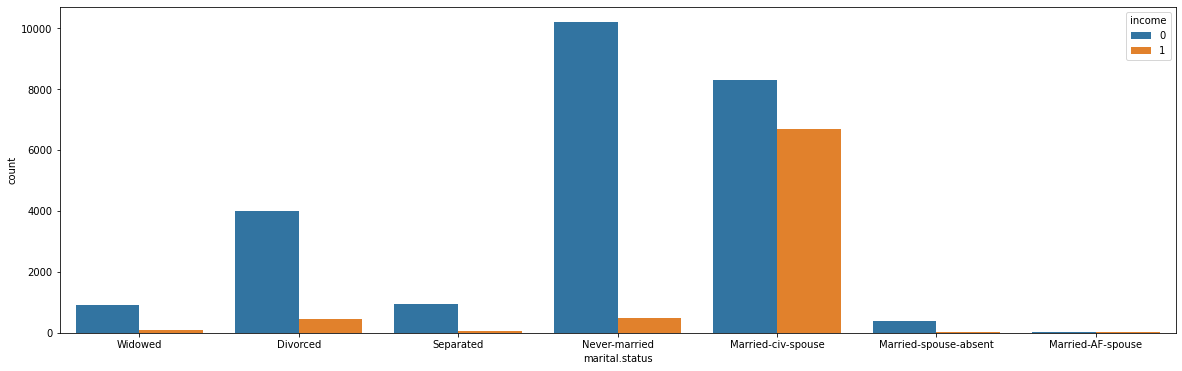

In [15]:
plt.figure(figsize=(20, 6))
sns.countplot(data['marital.status'], hue=data['income'])
plt.show()

## Data Preparation

Now the data needs to be prepared for prediction.

In [16]:
data['sex'] = data['sex'].map({'Male': 1, 'Female': 0}) 

In [17]:
data['race'] = data['race'].map({'White': 1, 'Asian-Pac-Islander': 1, 'Black':0, 'Amer-Indian-Eskimo':0, 'Other':0}) 
data['relationship'] = data['relationship'].map({'Not-in-family':0, 'Unmarried':0, 'Own-child':0, 'Other-relative':0, 'Husband':1, 'Wife':1})
data['marital.status'] = data['marital.status'].map({'Widowed':0, 'Divorced':0, 'Separated':0, 'Never-married':0, 'Married-civ-spouse':1, 'Married-AF-spouse':1, 'Married-spouse-absent':0})

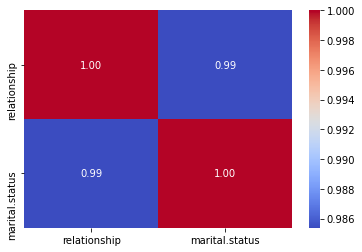

In [18]:
g = sns.heatmap(data[['relationship', 'marital.status']].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")
plt.show()

relationship and marital.status contain the same information now, so one of them can be removed

In [19]:
data.drop(['marital.status'], axis=1,inplace=True)

LabelEncoder can be used to transform the rest of the categorical features.

In [20]:
# data.drop(['workclass', 'education', 'occupation', 'native.country'], axis=1,inplace=True)

data.drop(['education'], axis=1,inplace=True)

labels = ['workclass', 'occupation', 'native.country']

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for l in labels:
    data[l]=le.fit_transform(data[l])



In [21]:
data.head(10)

,age,workclass,fnlwgt,education.num,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,0,77053,9,0,0,1,0,0,4356,40,39,0
1,82,4,132870,9,4,0,1,0,0,4356,18,39,0
2,66,0,186061,10,0,0,0,0,0,4356,40,39,0
3,54,4,140359,4,7,0,1,0,0,3900,40,39,0
4,41,4,264663,10,10,0,1,0,0,3900,40,39,0
5,34,4,216864,9,8,0,1,0,0,3770,45,39,0
6,38,4,150601,6,1,0,1,1,0,3770,40,39,0
7,74,7,88638,16,10,0,1,0,0,3683,20,39,1
8,68,1,422013,9,10,0,1,0,0,3683,40,39,0
9,41,4,70037,10,3,0,1,1,0,3004,60,0,1


The dataset is ready.

## Prediction

#### Importing the relevant libraries

In [22]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, StratifiedKFold, learning_curve, train_test_split, KFold
# from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.svm import SVC

#### Preparing data for training and testing with k-fold Cross-Validation

In [33]:
seed = 42

from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(data.loc[:, data.columns != 'income'])
Y = data['income']

# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

kf = KFold(n_splits=10, shuffle=True, random_state=seed)


In [34]:
a = len(data.loc[data.income==0])/len(data)
print(a)

0.7591904425539756


One would get a 76% accuracy by just always predicting <=50k. Our model has to do better than that or it's not learning anything.

### Starting with some simple models

In [ ]:

fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(24, 14))


classifiers = [
    LogisticRegression(solver='newton-cg'),
    KNeighborsClassifier(n_neighbors=17), # Some trial and error I don't show went into this hyperpa
    LinearDiscriminantAnalysis(),
    GaussianNB()
]


for i, c in enumerate(classifiers):
    
    x_axs = i%2
    y_axs = int(i/2)
    # print(c)
    print(type(c).__name__)
    pred = cross_val_predict(c, X, Y, cv=kf)
    print("Accuracy score:", round(accuracy_score(Y, pred), 4), '\n')

    sns.heatmap(confusion_matrix(Y, pred), annot=True, fmt='g', ax=axs[y_axs][x_axs])
    axs[y_axs][x_axs].set_xlabel('Predicted')
    axs[y_axs][x_axs].set_ylabel('Real')
    axs[y_axs][x_axs].set_title(type(c).__name__)

plt.show()

Logistic regression performs best with 84.25% accuracy. 


### More complex models

In [ ]:
import warnings
warnings.filterwarnings(action='ignore')
fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(24, 21))

classifiers = [
    DecisionTreeClassifier(),
    BaggingClassifier(),
    RandomForestClassifier(),
    ExtraTreesClassifier(),
    GradientBoostingClassifier(),
    AdaBoostClassifier()
]


for i, c in enumerate(classifiers):
    
    x_axs = i%2
    y_axs = int(i/2)
    
    # print(c)
    print(type(c).__name__)
    pred = cross_val_predict(c, X, Y, cv=kf)
    print("Accuracy score:", round(accuracy_score(Y, pred), 4), '\n')
    
    sns.heatmap(confusion_matrix(Y, pred), annot=True, fmt='g', ax=axs[y_axs][x_axs])
    axs[y_axs][x_axs].set_xlabel('Predicted')
    axs[y_axs][x_axs].set_ylabel('Real')
    axs[y_axs][x_axs].set_title(type(c).__name__)

plt.show()

Gradient Boosting with no hyperparameter tuning gets to 86.58% accuracy. Not bad. Let's see if we can do better.

### Model Tuning

GridSearchCV allows to try out a lot of hyperparameters at once.

In [35]:
'''
# This takes about 2 hours to run
params = {'max_depth': [5, 6, 7], 
         'n_estimators': [100, 150, 200],
          'learning_rate': [0.1, 0.07, 0.05],
          'max_features': ['sqrt', 'log2', 3, 4, 5]
         }
'''


params = {'max_depth': [6], 
         'n_estimators': [200],
          'learning_rate': [0.07, 0.06],
          'max_features': [3,4]
         }

classifier = GradientBoostingClassifier()

grid = GridSearchCV(classifier, param_grid=params, cv=kf)
search_result = grid.fit(X, Y)


In [36]:
# GridSearch results
means = search_result.cv_results_['mean_test_score']
params = search_result.cv_results_['params']
for m, p in zip(means, params):
    print(f"{m} with: {p}")

0.8714721325981689 with: {'learning_rate': 0.07, 'max_depth': 6, 'max_features': 3, 'n_estimators': 200}
0.872639237054343 with: {'learning_rate': 0.07, 'max_depth': 6, 'max_features': 4, 'n_estimators': 200}
0.8728541870505333 with: {'learning_rate': 0.06, 'max_depth': 6, 'max_features': 3, 'n_estimators': 200}
0.8733148467221232 with: {'learning_rate': 0.06, 'max_depth': 6, 'max_features': 4, 'n_estimators': 200}


In [ ]:
p = np.argmax(means)
best_param = params[p]

final_model = GradientBoostingClassifier(**best_param)

print(final_model)
pred = cross_val_predict(final_model, X, Y, cv=kf)
print("Accuracy score:", round(accuracy_score(Y, pred), 4), '\n')

sns.heatmap(confusion_matrix(Y, pred), annot=True, fmt='g')
plt.show()


Final prediction accuracy: 87.35%

## Fairness

In [23]:
# This DataFrame is created to stock differents models and fair metrics that we produce in this notebook
algo_metrics = pd.DataFrame(columns=['model', 'fair_metrics', 'prediction', 'probs'])

def add_to_df_algo_metrics(algo_metrics, model, fair_metrics, preds, probs, name):
    return algo_metrics.append(pd.DataFrame(data=[[model, fair_metrics, preds, probs]], columns=['model', 'fair_metrics', 'prediction', 'probs'], index=[name]))

In [24]:
def fair_metrics(dataset, pred, pred_is_dataset=False):
    if pred_is_dataset:
        dataset_pred = pred
    else:
        dataset_pred = dataset.copy()
        dataset_pred.labels = pred
    
    cols = ['statistical_parity_difference', 'equal_opportunity_difference', 'average_abs_odds_difference',  'disparate_impact', 'theil_index']
    obj_fairness = [[0,0,0,1,0]]
    
    fair_metrics = pd.DataFrame(data=obj_fairness, index=['objective'], columns=cols)
    
    for attr in dataset_pred.protected_attribute_names:
        idx = dataset_pred.protected_attribute_names.index(attr)
        privileged_groups =  [{attr:dataset_pred.privileged_protected_attributes[idx][0]}] 
        unprivileged_groups = [{attr:dataset_pred.unprivileged_protected_attributes[idx][0]}] 
        
        classified_metric = ClassificationMetric(dataset, 
                                                     dataset_pred,
                                                     unprivileged_groups=unprivileged_groups,
                                                     privileged_groups=privileged_groups)

        metric_pred = BinaryLabelDatasetMetric(dataset_pred,
                                                     unprivileged_groups=unprivileged_groups,
                                                     privileged_groups=privileged_groups)

        acc = classified_metric.accuracy()

        row = pd.DataFrame([[metric_pred.mean_difference(),
                                classified_metric.equal_opportunity_difference(),
                                classified_metric.average_abs_odds_difference(),
                                metric_pred.disparate_impact(),
                                classified_metric.theil_index()]],
                           columns  = cols,
                           index = [attr]
                          )
        fair_metrics = fair_metrics.append(row)    
    
    fair_metrics = fair_metrics.replace([-np.inf, np.inf], 2)
        
    return fair_metrics

def plot_fair_metrics(fair_metrics):
    fig, ax = plt.subplots(figsize=(20,4), ncols=5, nrows=1)

    plt.subplots_adjust(
        left    =  0.125, 
        bottom  =  0.1, 
        right   =  0.9, 
        top     =  0.9, 
        wspace  =  .5, 
        hspace  =  1.1
    )

    y_title_margin = 1.2

    plt.suptitle("Fairness metrics", y = 1.09, fontsize=20)
    sns.set(style="dark")

    cols = fair_metrics.columns.values
    obj = fair_metrics.loc['objective']
    size_rect = [0.2,0.2,0.2,0.4,0.25]
    rect = [-0.1,-0.1,-0.1,0.8,0]
    bottom = [-1,-1,-1,0,0]
    top = [1,1,1,2,1]
    bound = [[-0.1,0.1],[-0.1,0.1],[-0.1,0.1],[0.8,1.2],[0,0.25]]

    display(Markdown("### Check bias metrics :"))
    display(Markdown("A model can be considered bias if just one of these five metrics show that this model is biased."))
    for attr in fair_metrics.index[1:len(fair_metrics)].values:
        display(Markdown("#### For the %s attribute :"%attr))
        check = [bound[i][0] < fair_metrics.loc[attr][i] < bound[i][1] for i in range(0,5)]
        display(Markdown("With default thresholds, bias against unprivileged group detected in **%d** out of 5 metrics"%(5 - sum(check))))

    for i in range(0,5):
        plt.subplot(1, 5, i+1)
        ax = sns.barplot(x=fair_metrics.index[1:len(fair_metrics)], y=fair_metrics.iloc[1:len(fair_metrics)][cols[i]])
        
        for j in range(0,len(fair_metrics)-1):
            a, val = ax.patches[j], fair_metrics.iloc[j+1][cols[i]]
            marg = -0.2 if val < 0 else 0.1
            ax.text(a.get_x()+a.get_width()/5, a.get_y()+a.get_height()+marg, round(val, 3), fontsize=15,color='black')

        plt.ylim(bottom[i], top[i])
        plt.setp(ax.patches, linewidth=0)
        ax.add_patch(patches.Rectangle((-5,rect[i]), 10, size_rect[i], alpha=0.3, facecolor="green", linewidth=1, linestyle='solid'))
        plt.axhline(obj[i], color='black', alpha=0.3)
        plt.title(cols[i])
        ax.set_ylabel('')    
        ax.set_xlabel('')

In [25]:
def get_fair_metrics_and_plot(data, model, plot=False, model_aif=False):
    pred = model.predict(data).labels if model_aif else model.predict(data.features)
    # fair_metrics function available in the metrics.py file
    fair = fair_metrics(data, pred)

    if plot:
        # plot_fair_metrics function available in the visualisations.py file
        # The visualisation of this function is inspired by the dashboard on the demo of IBM aif360 
        plot_fair_metrics(fair)
        display(fair)
    
    return fair

In [26]:
data

,age,workclass,fnlwgt,education.num,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,0,77053,9,0,0,1,0,0,4356,40,39,0
1,82,4,132870,9,4,0,1,0,0,4356,18,39,0
2,66,0,186061,10,0,0,0,0,0,4356,40,39,0
3,54,4,140359,4,7,0,1,0,0,3900,40,39,0
4,41,4,264663,10,10,0,1,0,0,3900,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,4,310152,10,11,0,1,1,0,0,40,39,0
32557,27,4,257302,12,13,1,1,0,0,0,38,39,0
32558,40,4,154374,9,7,1,1,1,0,0,40,39,1
32559,58,4,151910,9,1,0,1,0,0,0,40,39,0


In [27]:
#print(X)


#combine_final = [train_df, test_df]
#result = pd.concat(combine_final)
#print(result.ifany())
#print(result)
privileged_groups = [{'sex': 1}]
unprivileged_groups = [{'sex': 0}]
dataset_orig = StandardDataset(data,
                                  label_name='income',
                                  protected_attribute_names=['sex'],
                                  favorable_classes=[1],
                                  privileged_classes=[[1]])

#metric_orig_train = BinaryLabelDatasetMetric(dataset_orig, 
#                                             unprivileged_groups=unprivileged_groups,
#                                             privileged_groups=privileged_groups)
#display(Markdown("#### Original training dataset"))
#print("Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_orig_train.mean_difference())


In [28]:
metric_orig_train = BinaryLabelDatasetMetric(dataset_orig, 
                                             unprivileged_groups=unprivileged_groups,
                                             privileged_groups=privileged_groups)
display(Markdown("#### Original training dataset"))
print("Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_orig_train.mean_difference())

#### Original training dataset

Difference in mean outcomes between unprivileged and privileged groups = -0.196276


In [29]:
import ipynbname
nb_fname = ipynbname.name()
nb_path = ipynbname.path()

from sklearn.ensemble import GradientBoostingClassifier
import pickle

data_orig_train, data_orig_test = dataset_orig.split([0.7], shuffle=True)
X_train = data_orig_train.features
y_train = data_orig_train.labels.ravel()

X_test = data_orig_test.features
y_test = data_orig_test.labels.ravel()
num_estimators = 200

model = GradientBoostingClassifier(n_estimators= 1, learning_rate = 0.06, max_depth = 6, max_features = 4)

mdl = model.fit(X_train, y_train)
with open('../../Results/GBC/' + nb_fname + '.pkl', 'wb') as f:
        pickle.dump(mdl, f)

with open('../../Results/GBC/' + nb_fname + '_Train' + '.pkl', 'wb') as f:
    pickle.dump(data_orig_train, f) 
    
with open('../../Results/GBC/' + nb_fname + '_Test' + '.pkl', 'wb') as f:
    pickle.dump(data_orig_test, f) 

In [30]:
from csv import writer
from sklearn.metrics import accuracy_score, f1_score

final_metrics = []
accuracy = []
f1= []

for i in range(1,num_estimators+1):
    
    model = GradientBoostingClassifier(n_estimators= i, learning_rate = 0.06, max_depth = 6, max_features = 4)
    mdl = model.fit(X_train, y_train)
    yy = mdl.predict(X_test)
    accuracy.append(accuracy_score(y_test, yy))
    f1.append(f1_score(y_test, yy))
    fair = get_fair_metrics_and_plot(data_orig_test, mdl)                           
    fair_list = fair.iloc[1].tolist()
    #fair_list.insert(0, i)
    final_metrics.append(fair_list)


invalid value encountered in double_scalars
invalid value encountered in double_scalars
invalid value encountered in double_scalars
invalid value encountered in double_scalars
invalid value encountered in double_scalars
invalid value encountered in double_scalars


In [31]:
import numpy as np
final_result = pd.DataFrame(final_metrics)
#print(final_result)
final_result[3] = np.log(final_result[3])
final_result = final_result.transpose()
acc_f1 = pd.DataFrame(accuracy)
acc_f1['f1'] = f1
acc_f1 = pd.DataFrame(acc_f1).transpose()
acc = acc_f1.rename(index={0: 'accuracy', 1: 'f1'})
final_result = final_result.rename(index={0: 'statistical_parity_difference', 1: 'equal_opportunity_difference', 2: 'average_abs_odds_difference', 3: 'disparate_impact', 4: 'theil_index'})
final_result = pd.concat([acc,final_result])
final_result.columns = ['T' + str(col) for col in final_result.columns]
final_result.insert(0, "classifier", final_result['T' + str(num_estimators - 1)])   ##Add final metrics add the beginning of the df
final_result.to_csv('../../Results/GBC/' + nb_fname + '.csv')
final_result

,classifier,T0,T1,T2,T3,T4,T5,T6,T7,T8,...,T190,T191,T192,T193,T194,T195,T196,T197,T198,T199
accuracy,0.872351,0.760467,0.760467,0.760467,0.760467,0.760467,0.760467,0.789334,0.807452,0.812980,...,0.871328,0.872249,0.873375,0.873170,0.870406,0.873068,0.871942,0.872249,0.873682,0.872351
f1,0.712871,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.215103,0.328933,0.362304,...,0.709364,0.712310,0.713856,0.713923,0.706673,0.715074,0.711685,0.712839,0.715930,0.712871
statistical_parity_difference,-0.189999,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.022461,-0.044428,-0.050609,...,-0.190979,-0.190168,-0.187420,-0.188638,-0.187750,-0.188115,-0.187066,-0.193245,-0.188292,-0.189999
equal_opportunity_difference,-0.147106,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.005272,-0.061918,-0.066308,...,-0.155709,-0.155022,-0.154002,-0.149235,-0.157417,-0.141740,-0.145066,-0.160210,-0.147527,-0.147106
average_abs_odds_difference,0.110612,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002636,0.031028,0.033805,...,0.115337,0.114067,0.111861,0.110591,0.114476,0.106894,0.108163,0.117952,0.109314,0.110612
disparate_impact,-1.241265,NaN,NaN,NaN,NaN,NaN,NaN,-0.967941,-1.263321,-1.272290,...,-1.268479,-1.247685,-1.234443,-1.239038,-1.244407,-1.214457,-1.216086,-1.270969,-1.223491,-1.241265
theil_index,0.101981,0.273823,0.273823,0.273823,0.273823,0.273823,0.273823,0.236566,0.213716,0.206585,...,0.103430,0.102252,0.102036,0.101867,0.104450,0.101110,0.102433,0.101935,0.100986,0.101981
